In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib qt

import numpy as np
import autoreject
import csv
import matplotlib.pyplot as plt
import pandas as pd
import mne
import os
import sys
#sys.path.append('../..')
from atpbar import atpbar
from utils.csv_utils_new import *
from utils.lsl_utils_new import *
from utils.MNE_utils import *

# raw --> epochs & save

In [6]:
def raw_to_events(raw):
    event_id = {'-1':-1, '1':1, '-2':2, '2':2, '-3':-3, '3':3}
    events = mne.events_from_annotations(raw, event_id=event_id)[0]
    if len(events)==0:
        events = np.zeros((1,3))
        events = events.astype(int)
    return events 

def fname_to_epoch (fname):
    raw = mne.io.read_raw_fif(import_path+fname+'-raw.fif', preload=True)
    raw.filter(l_freq=0.1, h_freq=60)
    raw.notch_filter(60)
    
    events = raw_to_events(raw)
    print (events[:,2])
    
    epochs = mne.Epochs(raw, events, tmin=-0.1, tmax=1.0, baseline=(-0.1, 0), reject={'eeg': 150e-6}, preload=True)
    #epochs, epochs_ica, epochs_ar, rejection_log = clean_epochs_full(epochs)
    return epochs


In [62]:
import_path = '/Users/jonasmago/PhD_code_data/Jhana_US/analysis/mne.raw_mmn/'
export_path = '/Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/'

epochs_jhana = None
epochs_mindfulness = None

if not os.path.exists(export_path):
    os.makedirs(export_path)

#for subject in atpbar(range(10)):
for subject in atpbar([0]):
    epochs_jhana_subject = None
    epochs_mindfulness_subject = None
    for recording_name in ['jhana_mmn_eeg_fname', 'mindfulness_mmn_eeg_fname']:
        for sheet in ['jhana_day1', 'jhana_day2', 'jhana_day3', 'jhana_day4']: 
            fname = 'sub'+str(subject)+'-'+recording_name[:-10]+'-'+sheet[-4:]
            epochs = fname_to_epoch(fname)
            epochs.save(export_path+fname+'-epo.fif', overwrite=True)
            
            #this section is used to concatenate the responses
            if recording_name == 'jhana_mmn_eeg_fname':
                epochs_jhana = epochs if epochs_jhana is None else mne.concatenate_epochs([epochs_jhana, epochs])
                epochs_jhana_subject = epochs if epochs_jhana_subject is None else mne.concatenate_epochs([epochs_jhana_subject, epochs])
            if recording_name == 'mindfulness_mmn_eeg_fname':
                epochs_mindfulness = epochs if epochs_mindfulness is None else mne.concatenate_epochs([epochs_mindfulness, epochs])
                epochs_mindfulness_subject = epochs if epochs_mindfulness_subject is None else mne.concatenate_epochs([epochs_mindfulness_subject, epochs])
    epochs_jhana_subject.save(export_path+'jhana_sub'+str(subject)+'-epo.fif', overwrite=True)                
    epochs_mindfulness_subject.save(export_path+'mindfulness_sub'+str(subject)+'-epo.fif', overwrite=True)                

epochs_jhana.save(export_path+'jhana_all'+'-epo.fif', overwrite=True)        
epochs_mindfulness.save(export_path+'mindfulness_all'+'-epo.fif', overwrite=True)   

Opening raw data file /Users/jonasmago/PhD_code_data/Jhana_US/analysis/mne.raw_mmn/sub0-jhana_mmn-day1-raw.fif...


VBox()

    Range : 0 ... 219903 =      0.000 ...   858.996 secs
Ready.
Reading 0 ... 219903  =      0.000 ...   858.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 8449 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuatio

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['-1', '1']
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1
  1  1 -1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1
 -1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1
  1  1  1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1
  1  1  

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 8449 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['-1', '1']
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1
  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1
  1  1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1
  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1
 -1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:42: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_jhana = epochs if epochs_jhana is None else mne.concatenate_epochs([epochs_jhana, epochs])
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:43: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_jhana_subject = epochs if epochs_jhana_subject is None else mne.concatenate_epochs([epochs_jhana_subject, epochs])


Not setting metadata
669 matching events found
Applying baseline correction (mode: mean)
Opening raw data file /Users/jonasmago/PhD_code_data/Jhana_US/analysis/mne.raw_mmn/sub0-jhana_mmn-day3-raw.fif...
    Range : 0 ... 217199 =      0.000 ...   848.434 secs
Ready.
Reading 0 ... 217199  =      0.000 ...   848.434 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 8449 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['-1', '1']
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1
  1 -1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1
 -1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1
 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1
  1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
 -1  1  1  1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1  1
  1  1 -

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:42: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_jhana = epochs if epochs_jhana is None else mne.concatenate_epochs([epochs_jhana, epochs])


Not setting metadata
909 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
909 matching events found
Applying baseline correction (mode: mean)
Opening raw data file /Users/jonasmago/PhD_code_data/Jhana_US/analysis/mne.raw_mmn/sub0-jhana_mmn-day4-raw.fif...
    Range : 0 ... 225967 =      0.000 ...   882.684 secs
Ready.
Reading 0 ... 225967  =      0.000 ...   882.684 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)


/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:43: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_jhana_subject = epochs if epochs_jhana_subject is None else mne.concatenate_epochs([epochs_jhana_subject, epochs])


- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 8449 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['-1', '1']
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
 -1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1
  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1
  1 -1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1
  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1
 -1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1
  1  1  

    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2', 'AF3', 'AF4', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'C3', 'Cz', 'C4', 'CP5', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'O2']
    Rejecting  epoch based on EEG : ['CP2', 'P7', 'P8', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['CP2', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'O2']

    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'POz', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['C3', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on E

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P8', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['AF4', 'C3', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['AF4', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based

/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:38: RuntimeWarning: Saving epochs with no data
  epochs.save(export_path+fname+'-epo.fif', overwrite=True)
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:42: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_jhana = epochs if epochs_jhana is None else mne.concatenate_epochs([epochs_jhana, epochs])
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:42: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  epochs_jhana = epochs if epochs_jhana is None else mne.concatenate_epochs([epochs_jhana, epochs])
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:43: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_jhana_subject = epochs if epochs_jhana_subject is None else 

Opening raw data file /Users/jonasmago/PhD_code_data/Jhana_US/analysis/mne.raw_mmn/sub0-mindfulness_mmn-day1-raw.fif...
    Range : 0 ... 216663 =      0.000 ...   846.340 secs
Ready.
Reading 0 ... 216663  =      0.000 ...   846.340 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 8449 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['-1', '1']
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1
  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1
  1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1  1  1
 -1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
 -1  1 -1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1
  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1
  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 8449 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['-1', '1']
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1
  1 -1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1
  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1  1
  1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1 -1
  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1 -1  1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1  1  1
  1 -1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1
  1  1  

    Rejecting  epoch based on EEG : ['FC1', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC1', 'POz']
    Rejecting  epoch based on EEG : ['FC1', 'POz']
    Rejecting  epoch based on EEG : ['POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2', 'AF3', 'AF4', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting

    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['Pz', 'P8', 'POz']
    Rejecting  epoch based on EEG : ['POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'T7', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['POz']
    Rejecting  epoch based on EEG : ['FC6', 'POz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2', 'AF3', 'AF4', 'F7', 'F3', 'Fz', 'T

/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:38: RuntimeWarning: Saving epochs with no data
  epochs.save(export_path+fname+'-epo.fif', overwrite=True)
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:45: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_mindfulness = epochs if epochs_mindfulness is None else mne.concatenate_epochs([epochs_mindfulness, epochs])
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:45: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  epochs_mindfulness = epochs if epochs_mindfulness is None else mne.concatenate_epochs([epochs_mindfulness, epochs])
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:46: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_mindfulness_subject = ep

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['-1', '1']
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1
  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1
  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1
  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1
  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
 -1  1 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:45: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_mindfulness = epochs if epochs_mindfulness is None else mne.concatenate_epochs([epochs_mindfulness, epochs])
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:46: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_mindfulness_subject = epochs if epochs_mindfulness_subject is None else mne.concatenate_epochs([epochs_mindfulness_subject, epochs])


Opening raw data file /Users/jonasmago/PhD_code_data/Jhana_US/analysis/mne.raw_mmn/sub0-mindfulness_mmn-day4-raw.fif...
    Range : 0 ... 224911 =      0.000 ...   878.559 secs
Ready.
Reading 0 ... 224911  =      0.000 ...   878.559 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 8449 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['-1', '1']
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1
 -1  1 -1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1
 -1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1
  1  1 -

    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['F8', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'CP2', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'CP2', 'P7']
    Rejecting  epoch based on EEG : [

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O1']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'P4']
    Rejecting  epoch based on EEG : ['F3', 'Fz', 'FC1', 'CP1', 'CP2', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'CP2', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'POz']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O1']
    Reject

/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:38: RuntimeWarning: Saving epochs with no data
  epochs.save(export_path+fname+'-epo.fif', overwrite=True)
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:45: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_mindfulness = epochs if epochs_mindfulness is None else mne.concatenate_epochs([epochs_mindfulness, epochs])
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:45: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  epochs_mindfulness = epochs if epochs_mindfulness is None else mne.concatenate_epochs([epochs_mindfulness, epochs])
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_39098/1350655601.py:46: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_mindfulness_subject = ep

Overwriting existing file.


# TESTING HAND CLEANING

Opening raw data file /Users/jonasmago/PhD_code_data/Jhana_US/analysis/mne.raw_mmn/sub7-mindfulness_mmn-day4-raw.fif...
    Range : 0 ... 220959 =      0.000 ...   863.121 secs
Ready.
Reading 0 ... 220959  =      0.000 ...   863.121 secs...
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1691 samples (6.605 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['-1', '1']
Not setting metadata
363 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 363 events and 283 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2', 'AF3', 'AF4', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['F8', 'O1', 'Oz']
    Rejecting  epoch based on EEG : ['F8', 'O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['F8', 'POz', 'O1', 'Oz']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting 

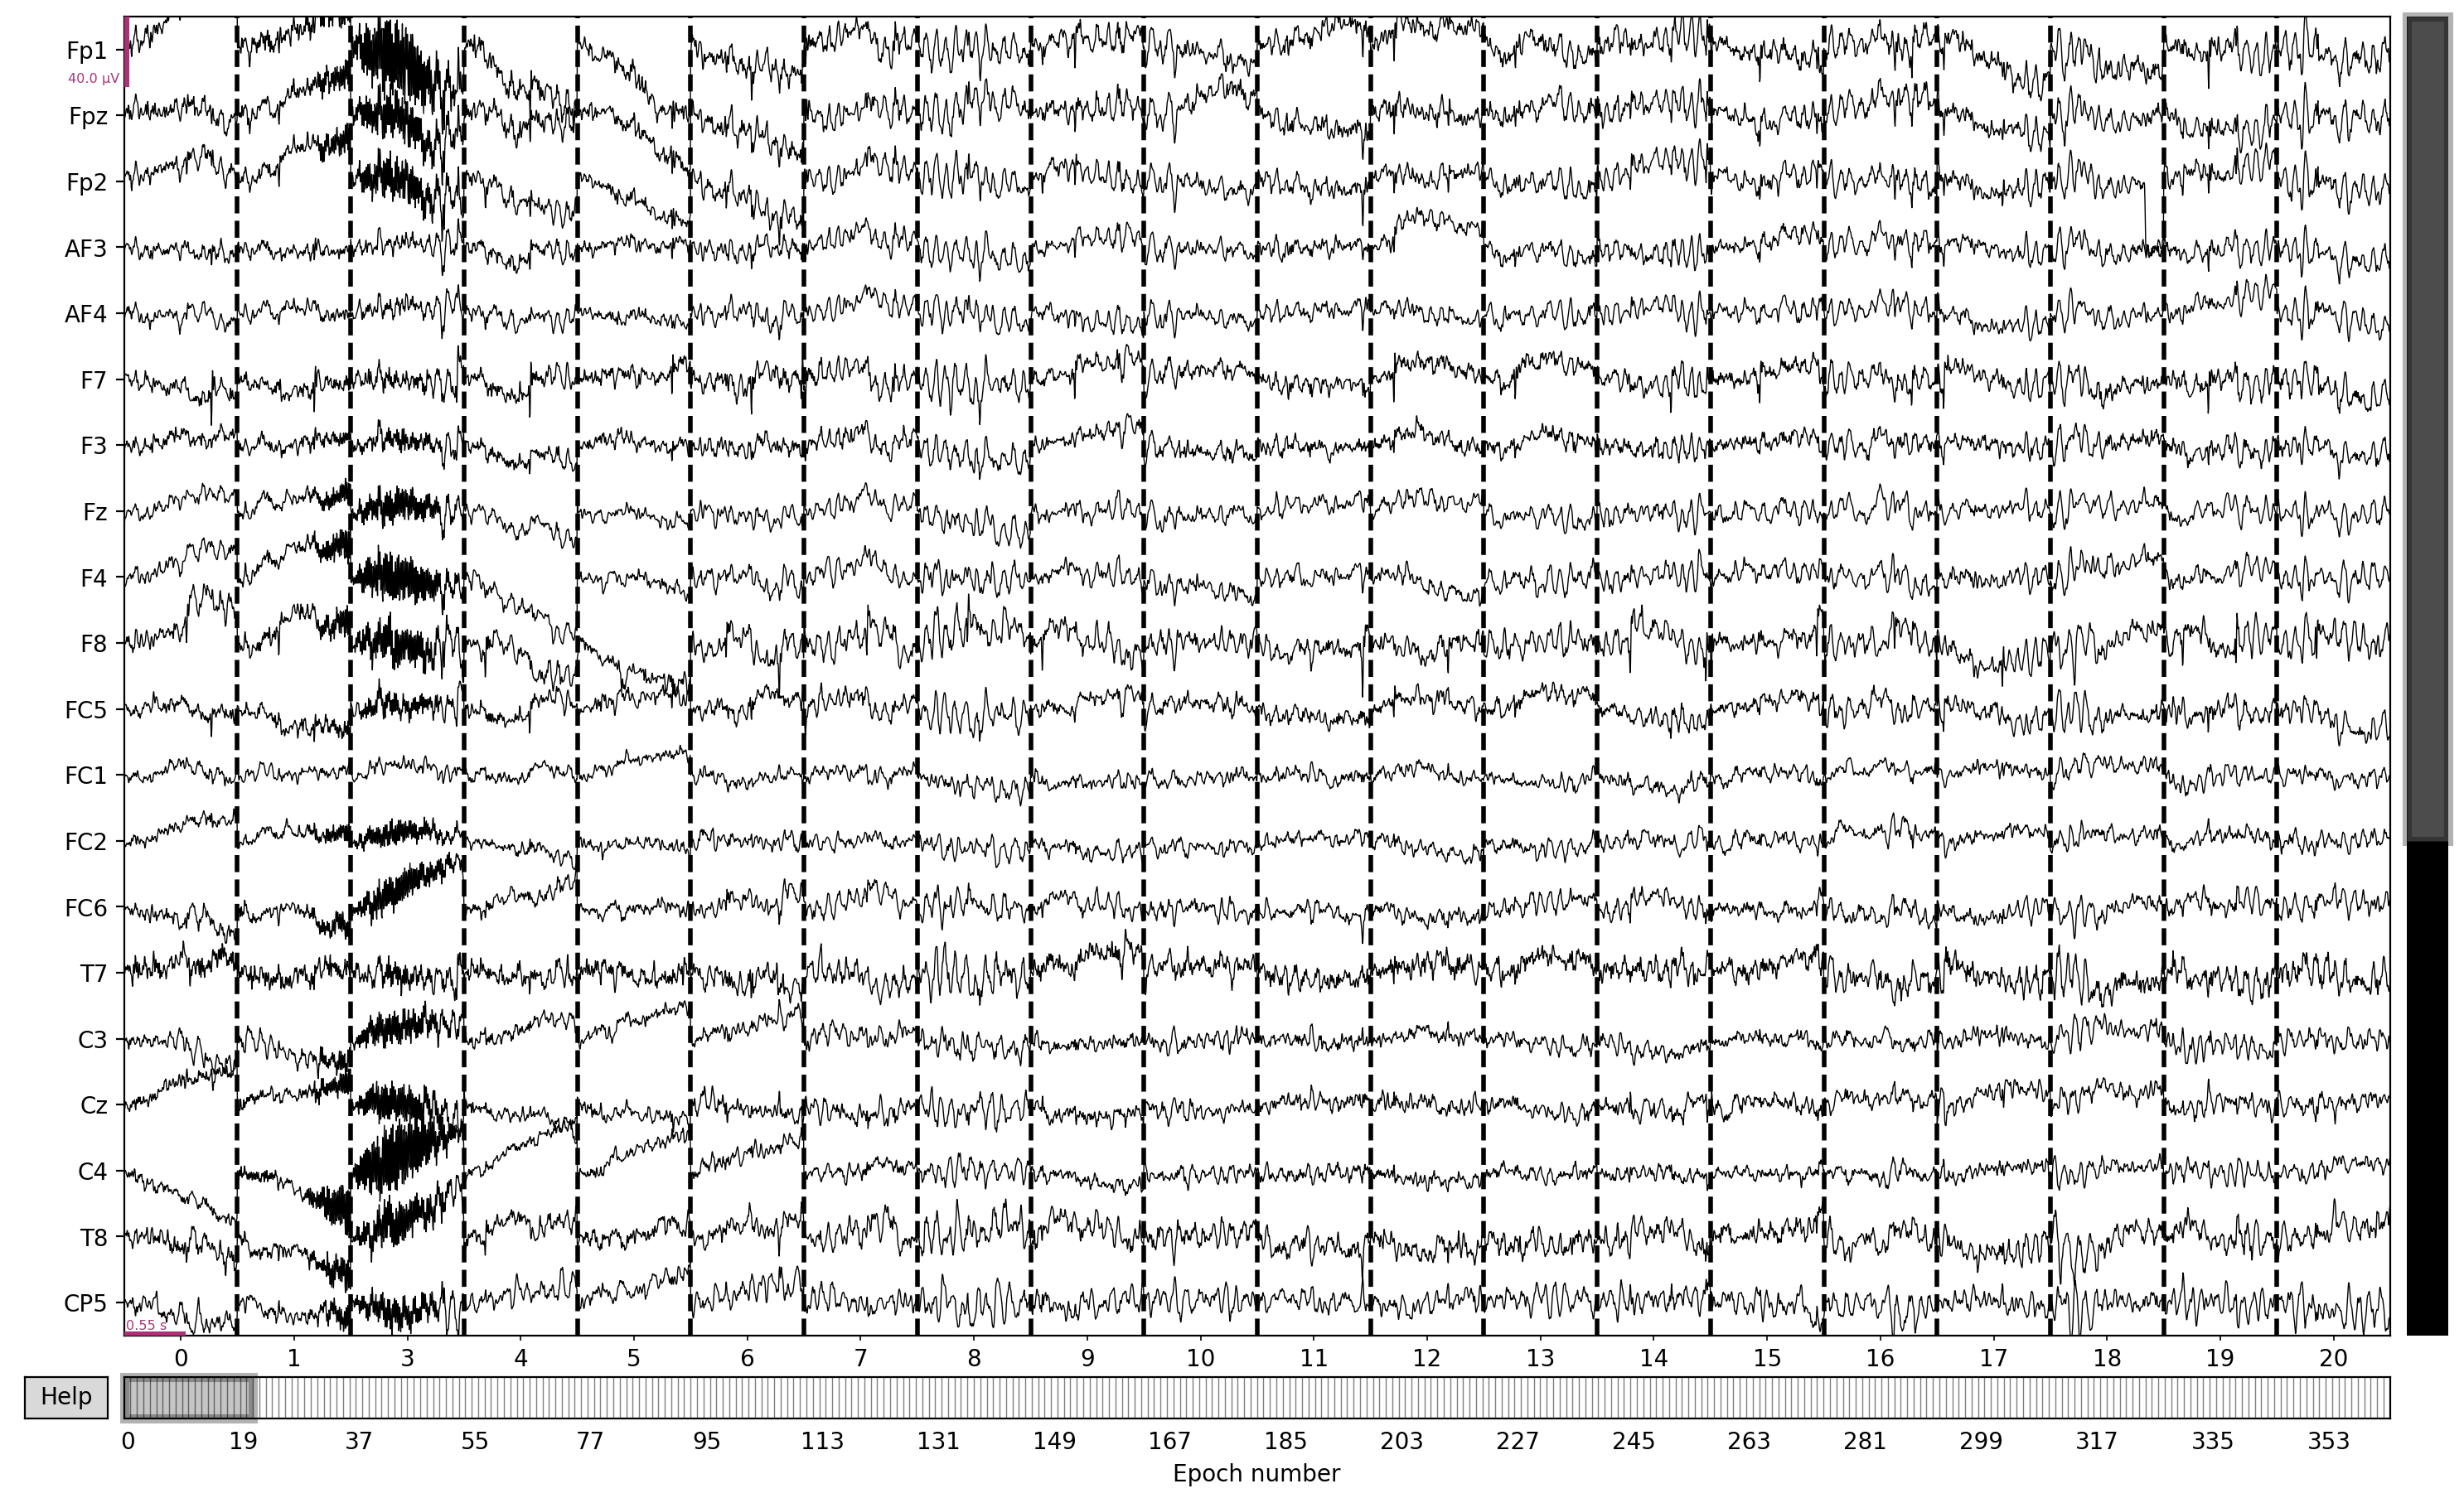

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none


In [14]:
try:
    epochs_hand_cleaned
except NameError:
    epochs_hand_cleaned = {}
    raw_hand_cleaned = {}

condition = 'sub7-mindfulness_mmn-day4'
tmp_path = f'/Users/jonasmago/PhD_code_data/Jhana_US/analysis/mne.raw_mmn/{condition}-raw.fif'
export_path_raw = f'/Users/jonasmago/Desktop/jhana_mmn_hand_cleaned/{condition}-raw.fif'
export_path_epochs = f'/Users/jonasmago/PhD_code_data/Jhana_US/{condition}-epo.fif'

raw = mne.io.read_raw_fif(tmp_path, preload=True)
#raw.plot_psd()
raw.notch_filter(60).filter(0.1, 60).plot()

raw.set_eeg_reference(ref_channels='average')
#raw.plot_psd()
events = raw_to_events(raw)
epochs = mne.Epochs(raw, events, tmin=-0.1, tmax=1.0, baseline=(-0.1, 0), reject={'eeg': 150e-6}, preload=True)

epochs_hand_cleaned[condition] = epochs
raw_hand_cleaned[condition] = raw

epochs_hand_cleaned['sub7-mindfulness_mmn-day4'].plot()
# epochs_jhana = mne.concatenate_epochs([epochs_hand_cleaned['sub7-jhana_mmn-day1'], epochs_hand_cleaned['sub7-jhana_mmn-day3'],epochs_hand_cleaned['sub7-jhana_mmn-day4']])

# testing cleaning strategies

In [77]:
def plot_evokeds (epochs):
    evokeds = dict()
    subset = epochs['1']
    evokeds['standard'] = list(subset.iter_evoked())
    subset = epochs['-1']
    evokeds['oddball'] = list(subset.iter_evoked())
    mne.viz.plot_compare_evokeds(evokeds, picks='Fz', ci=0.95, title=f'global oddball evoked response: subject {str(subject)}, {condition}') #Fz for MMN, Pz for LTP

In [187]:
subject = 7 #0-9, not 6
for condition in ['jhana', 'mindfulness']:
    fname = f'/Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/{condition}_sub{str(subject)}-epo.fif'

    epochs = mne.read_epochs(fname)
    
#    ar = autoreject.AutoReject(n_interpolate=[1, 2, 3, 4], random_state=11,n_jobs=1, verbose=True)
#    ar.fit(epochs)
#    epochs, reject_log = ar.transform(epochs, return_log=True)

    #epochs.filter(1, 40)
    #epochs = epochs.set_eeg_reference(ref_channels='average')

    evokeds = dict()
    subset = epochs['1']
    evokeds['standard'] = list(subset.iter_evoked())
    subset = epochs['-1']
    evokeds['oddball'] = list(subset.iter_evoked())
    #mne.viz.plot_compare_evokeds(evokeds, picks='Fz', ci=0.95, title=f'global oddball evoked response: subject {str(subject)}, {condition}') #Fz for MMN, Pz for LTP
    mne.viz.plot_compare_evokeds(evokeds, picks='Fz', ci=0.95, title=f'global oddball evoked response: {condition}') #Fz for MMN, Pz for LTP


Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/jhana_sub7-epo.fif ...
    Found the data of interest:
        t =    -101.56 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1157 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/mindfulness_sub7-epo.fif ...
    Found the data of interest:
        t =    -101.56 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
995 matching events found
No baseline correction applied
0 projection items activated


2023-10-04 10:34:54.165 python[39098:5274541] +[CATransaction synchronize] called within transaction
2023-10-04 10:35:08.836 python[39098:5274541] +[CATransaction synchronize] called within transaction


In [ ]:
# clean EPOCHS

def clean_epochs_full (epochs):
    ica = mne.preprocessing.ICA(n_components=32, random_state=97, max_iter="auto")
    ica.fit(epochs)
    muscle_idx_auto, scores = ica.find_bads_muscle(epochs)
    print (f"excluded ICA components: {muscle_idx_auto}")
    epochs_ica = ica.apply(epochs.copy(), exclude=muscle_idx_auto)
    
    ar = autoreject.AutoReject(n_interpolate=[1, 2, 3, 4], random_state=11,n_jobs=1, verbose=False)
    ar.fit(epochs_ica)
    epochs_ar, reject_log = ar.transform(epochs_ica, return_log=True)
    epochs_ar.filter(None, 40)
    print (f"retention rate: {len(epochs_ar)}/{len(epochs)}")
    return (epochs, epochs_ica, epochs_ar, reject_log)

# plot ALL evokeds (Jhana & Mindfulness)

In [4]:
epochs_path = '/Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/'


for meditation in ['jhana', 'mindfulness']:
    epochs = mne.read_epochs(f'{epochs_path}{meditation}_all-epo.fif')
    
    epochs.crop(tmax=0.4)
    evokeds = dict()
    subset = epochs['1']
    evokeds['standard'] = list(subset.iter_evoked())
    subset = epochs['-1']
    evokeds['oddball'] = list(subset.iter_evoked())

    mne.viz.plot_compare_evokeds(evokeds, picks='Fz', ci=0.95, title=f'global oddball evoked response during {meditation}', truncate_yaxis=True) #Fz for MMN, Pz for LTP
    
"""
    #the code below computes the mean value for all evokeds
    mean = []
    start = 231 #in samples
    end = 384 
    for condition in ['standard', 'oddball']:
        for i in range(len(evokeds[condition])):
            tmp = np.mean(evokeds[condition][i].pick(['Fz']).data[0,start:end])
            mean.append(tmp)
        print (f'for {meditation} and {condition}, mean value: {np.mean(mean)}')
        
"""

Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/jhana_all-epo.fif ...
    Found the data of interest:
        t =    -101.56 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
909 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/mindfulness_all-epo.fif ...
    Found the data of interest:
        t =    -101.56 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
638 matching events found
No baseline correction applied
0 projection items activated


"\n    #the code below computes the mean value for all evokeds\n    mean = []\n    start = 231 #in samples\n    end = 384 \n    for condition in ['standard', 'oddball']:\n        for i in range(len(evokeds[condition])):\n            tmp = np.mean(evokeds[condition][i].pick(['Fz']).data[0,start:end])\n            mean.append(tmp)\n        print (f'for {meditation} and {condition}, mean value: {np.mean(mean)}')\n        \n"

# compare evokeds evokeds INDIVIDUAL (Jhana & Mindfulness)

In [5]:
export_path = '/Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/'
subjects = ['sub0', 'sub1', 'sub2', 'sub3', 'sub4', 'sub5', 'sub6', 'sub7', 'sub8', 'sub9']
subjects = ['sub0']
days = ['day1', 'day2', 'day3', 'day4']
days = ['day1']
meditations = ['jhana', 'mindfulness']

# Initialize an empty list to store each DataFrame
df = []
dfs = []

for subject in subjects:
    for day in days:
        for meditation in meditations:            
            file_path = f'{export_path}{subject}-{meditation}_mmn-{day}-epo.fif'
            try: 
                epochs = mne.read_epochs(file_path)                
                evokeds = dict()
                subset = epochs['1']
                evokeds['standard'] = list(subset.iter_evoked())
                subset = epochs['-1']
                evokeds['oddball'] = list(subset.iter_evoked())

                mean_by_condition = []
                for cond_name in ['oddball', 'standard']:
                    mean_10_15 = []
                    mean_15_20 = []
                    for i in range(len(evokeds[cond_name])):
                        start = np.where(evokeds[cond_name][i].times >= 0.1)[0][0]  # Find the index where time is 0s
                        end = np.where(evokeds[cond_name][i].times <= 0.15)[0][-1]  # Find the index where time is 1s
                        tmp = np.mean(evokeds[cond_name][i].pick(['Fz']).data[0,start:end])
                        mean_10_15.append(tmp)
                        
                        start = np.where(evokeds[cond_name][i].times >= 0.15)[0][0]  # Find the index where time is 0s
                        end = np.where(evokeds[cond_name][i].times <= 0.2)[0][-1]  # Find the index where time is 1s
                        tmp = np.mean(evokeds[cond_name][i].pick(['Fz']).data[0,start:end])
                        mean_15_20.append(tmp)
                        
                    mean_10_15 = np.mean(mean_10_15)
                    mean_15_20 = np.mean(mean_15_20)
                    df = pd.DataFrame([[mean_10_15]], columns=['mean_10_15'])
                    df['mean_15_20'] = mean_15_20
                    df['subject'] = subject
                    df['day'] = day
                    df['condition'] = cond_name
                    df['meditation'] = meditation
                    dfs.append(df)
            except: 
                print ("========================")
                print ('this file did not work:')
                print (file_path)
                print ("$$$$$$$$$$$$$$$$$$$$$$$$")


# Combine all DataFrames
df = pd.concat(dfs, ignore_index=True)

print('\n' * 2)
mean_comparison = df.groupby(['meditation', 'condition'])['mean_10_15'].mean()
print(mean_comparison)
print('\n' * 2)
mean_comparison = df.groupby(['meditation', 'condition'])['mean_15_20'].mean()
print(mean_comparison)

Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub0-jhana_mmn-day1-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
369 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub0-mindfulness_mmn-day1-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
173 matching events found
No baseline correction applied
0 projection items activated



meditation   condition
jhana        oddball     -0.000004
             standard    -0.000002
mindfulness  oddball     -0.000005
             standard    -0.000004
Name: mean_10_15, dtype: float64



meditation   condition
jhana        oddball     -0.000009
             standard    -0.000001
mindfulness  oddball     -0.000006
            

## stats tetst

In [3]:
from scipy.stats import ttest_rel

def clean_series_pairs(series1, series2):
    """Return cleaned series by removing pairs with NaN values in either series."""
    mask = ~np.isnan(series1) & ~np.isnan(series2)
    return series1[mask], series2[mask]

def paired_ttest_all_sessions (df_input, meditation1, meditation2, condition1, condition2, feature, avg_subject=False):
    if avg_subject: 
        df = df_input.groupby(['subject', 'meditation', 'condition'])[feature].mean().reset_index()
    else:
        df=df_input
    series1 = df[(df['meditation'] == meditation1) & (df['condition'] == condition1)][feature]
    series2 = df[(df['meditation'] == meditation2) & (df['condition'] == condition2)][feature]
    series1_cleaned, series2_cleaned = clean_series_pairs(np.array(series1), np.array(series2))
    t_stat, p_val = ttest_rel(series1_cleaned, series2_cleaned)
    print (f'results for {feature}: {meditation1}–{condition1} VS. {meditation2}–{condition2}')
    print(f"paired t-test result: t = {t_stat}, p = {p_val}")

In [88]:
paired_ttest_all_sessions(df, 'jhana', 'jhana', 'oddball', 'standard', 'mean_15_20')
paired_ttest_all_sessions(df, 'mindfulness', 'mindfulness', 'oddball', 'standard', 'mean_15_20')
paired_ttest_all_sessions(df, 'jhana', 'mindfulness', 'oddball', 'oddball', 'mean_15_20')
paired_ttest_all_sessions(df, 'jhana', 'mindfulness', 'standard', 'standard', 'mean_15_20')

paired_ttest_all_sessions(df, 'jhana', 'jhana', 'oddball', 'standard', 'mean_10_15')
paired_ttest_all_sessions(df, 'mindfulness', 'mindfulness', 'oddball', 'standard', 'mean_10_15')
paired_ttest_all_sessions(df, 'jhana', 'mindfulness', 'oddball', 'oddball', 'mean_10_15')
paired_ttest_all_sessions(df, 'jhana', 'mindfulness', 'standard', 'standard', 'mean_10_15')

results for mean_15_20: jhana–oddball VS. jhana–standard
paired t-test result: t = -3.2750933242124107, p = 0.002485548886068595
results for mean_15_20: mindfulness–oddball VS. mindfulness–standard
paired t-test result: t = -2.4605106745015712, p = 0.01911021246758858
results for mean_15_20: jhana–oddball VS. mindfulness–oddball
paired t-test result: t = -1.3454955387771332, p = 0.18792242991215172
results for mean_15_20: jhana–standard VS. mindfulness–standard
paired t-test result: t = 0.1973519743357277, p = 0.8446937737442358
results for mean_10_15: jhana–oddball VS. jhana–standard
paired t-test result: t = -1.6904136483862924, p = 0.10037509418011176
results for mean_10_15: mindfulness–oddball VS. mindfulness–standard
paired t-test result: t = -0.33670723563581734, p = 0.738407142707858
results for mean_10_15: jhana–oddball VS. mindfulness–oddball
paired t-test result: t = -1.7628186474824896, p = 0.08748046411692244
results for mean_10_15: jhana–standard VS. mindfulness–standard
p

## testing features for Fpz

In [5]:
export_path = '/Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/'
subjects = ['sub0', 'sub1', 'sub2', 'sub3', 'sub4', 'sub5', 'sub6', 'sub7', 'sub8', 'sub9']
days = ['day1', 'day2', 'day3', 'day4']
meditations = ['jhana', 'mindfulness']

# Initialize an empty list to store each DataFrame
df = []
dfs = []

for subject in subjects:
    for day in days:
        for meditation in meditations:            
            file_path = f'{export_path}{subject}-{meditation}_mmn-{day}-epo.fif'
            try: 
                epochs = mne.read_epochs(file_path)                
                evokeds = dict()
                subset = epochs['1']
                evokeds['standard'] = list(subset.iter_evoked())
                subset = epochs['-1']
                evokeds['oddball'] = list(subset.iter_evoked())

                mean_by_condition = []
                for cond_name in ['oddball', 'standard']:
                    mean_50_70 = []
                    mean_40_50 = []
                    for i in range(len(evokeds[cond_name])):
                        start = np.where(evokeds[cond_name][i].times >= 0.5)[0][0]  # Find the index where time is 0s
                        end = np.where(evokeds[cond_name][i].times <= 0.7)[0][-1]  # Find the index where time is 1s
                        tmp = np.mean(evokeds[cond_name][i].pick_channels(['Fpz']).data[0,start:end])
                        mean_50_70.append(tmp)
                        
                        start = np.where(evokeds[cond_name][i].times >= 0.4)[0][0]  # Find the index where time is 0s
                        end = np.where(evokeds[cond_name][i].times <= 0.5)[0][-1]  # Find the index where time is 1s
                        tmp = np.mean(evokeds[cond_name][i].pick_channels(['Fpz']).data[0,start:end])
                        mean_40_50.append(tmp)
                        
                    mean_50_70 = np.mean(mean_50_70)
                    mean_40_50 = np.mean(mean_40_50)
                    df = pd.DataFrame([[mean_50_70]], columns=['mean_50_70'])
                    df['mean_40_50'] = mean_40_50
                    df['subject'] = subject
                    df['day'] = day
                    df['condition'] = cond_name
                    df['meditation'] = meditation
                    dfs.append(df)
            except: 
                print ("========================")
                print ('this file did not work:')
                print (file_path)
                print ("$$$$$$$$$$$$$$$$$$$$$$$$")


# Combine all DataFrames
df = pd.concat(dfs, ignore_index=True)

print('\n' * 2)
mean_comparison = df.groupby(['meditation', 'condition'])['mean_10_15'].mean()
print(mean_comparison)
print('\n' * 2)
mean_comparison = df.groupby(['meditation', 'condition'])['mean_15_20'].mean()
print(mean_comparison)

Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub0-jhana_mmn-day1-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub0-mindfulness_mmn-day1-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
65 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub0-jhana_mmn-day2-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
233 matching events found
No baseline cor

        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
142 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub3-mindfulness_mmn-day1-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
67 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub3-jhana_mmn-day2-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
336 matching events found
No baseline correction applied
0 projection items activated


/opt/anaconda3/envs/bitbrain/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/bitbrain/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub3-mindfulness_mmn-day2-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
361 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub3-jhana_mmn-day3-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub3-mindfulness_mmn-day3-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
192 matching events found
No baseli

/opt/anaconda3/envs/bitbrain/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/bitbrain/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub5-jhana_mmn-day2-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
344 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub5-mindfulness_mmn-day2-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub5-jhana_mmn-day3-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
161 matching events found
No baseline c

    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
61 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub8-mindfulness_mmn-day2-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
229 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub8-jhana_mmn-day3-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis

/opt/anaconda3/envs/bitbrain/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/bitbrain/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub8-mindfulness_mmn-day4-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
266 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub9-jhana_mmn-day1-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
78 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/Jhana_US/analysis/epochs_mmn/sub9-mindfulness_mmn-day1-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
340 matching events found
No basel

KeyError: 'Column not found: mean_10_15'

In [6]:
paired_ttest_all_sessions(df, 'jhana', 'jhana', 'oddball', 'standard', 'mean_50_70')
paired_ttest_all_sessions(df, 'mindfulness', 'mindfulness', 'oddball', 'standard', 'mean_50_70')
paired_ttest_all_sessions(df, 'jhana', 'mindfulness', 'oddball', 'oddball', 'mean_50_70')
paired_ttest_all_sessions(df, 'jhana', 'mindfulness', 'standard', 'standard', 'mean_50_70')

paired_ttest_all_sessions(df, 'jhana', 'jhana', 'oddball', 'standard', 'mean_40_50')
paired_ttest_all_sessions(df, 'mindfulness', 'mindfulness', 'oddball', 'standard', 'mean_40_50')
paired_ttest_all_sessions(df, 'jhana', 'mindfulness', 'oddball', 'oddball', 'mean_40_50')
paired_ttest_all_sessions(df, 'jhana', 'mindfulness', 'standard', 'standard', 'mean_40_50')

results for mean_50_70: jhana–oddball VS. jhana–standard
paired t-test result: t = -1.823701869420401, p = 0.07726543575009233
results for mean_50_70: mindfulness–oddball VS. mindfulness–standard
paired t-test result: t = -2.928057418839717, p = 0.006047301614155763
results for mean_50_70: jhana–oddball VS. mindfulness–oddball
paired t-test result: t = 0.5520880566672495, p = 0.584723631262074
results for mean_50_70: jhana–standard VS. mindfulness–standard
paired t-test result: t = 1.4371110186439655, p = 0.15956671585254983
results for mean_40_50: jhana–oddball VS. jhana–standard
paired t-test result: t = -1.7213839384528926, p = 0.09454489114930884
results for mean_40_50: mindfulness–oddball VS. mindfulness–standard
paired t-test result: t = -2.6282890122027647, p = 0.012786830657581374
results for mean_40_50: jhana–oddball VS. mindfulness–oddball
paired t-test result: t = 0.14114149168666407, p = 0.8886429498957689
results for mean_40_50: jhana–standard VS. mindfulness–standard
pair